In [1]:
!pip install mysql-connector

     ---------------------------------------- 11.9/11.9 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

You should consider upgrading via the 'c:\users\aditb\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp39-cp39-win_amd64.whl size=247945 sha256=98f6eb3c805fa87863385a37a27d58b1878a64814b45c1d759938dc3e4d5ab56
  Stored in directory: c:\users\aditb\appdata\local\pip\cache\wheels\7b\14\39\5aad423666e827dfe9a1fbcd111ac17171e7c9865d570780ce
Successfully built mysql-connector


In [2]:
!pip install pymysql

     ---------------------------------------- 43.8/43.8 KB 1.1 MB/s eta 0:00:00


You should consider upgrading via the 'c:\users\aditb\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [37]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mp
import os
import pymysql
import pandas as pd

In [38]:
host= os.getenv( 'Local' )
conn= pymysql.connect(
    host=host,
    port=int (3306),
    user= "root",
    passwd='<password>', # Put your password in this place
    db="restaurant",
    charset='utf8mb4')

In [39]:
orders = pd.read_sql('SELECT * FROM orders',conn)
waiters= pd.read_sql('SELECT * FROM waiter',conn)
dishes= pd.read_sql('SELECT * FROM dishes',conn)

c:\users\aditb\appdata\local\programs\python\python39\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy

c:\users\aditb\appdata\local\programs\python\python39\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy

c:\users\aditb\appdata\local\programs\python\python39\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [40]:
orders

,ORDERID,CUSTOMERID,WAITERID,TIP,MONTH_AND_DATE
0,1,74,2,6.92,1975-10-25
1,2,97,5,3.92,1986-06-22
2,3,91,3,9.05,1985-01-23
3,4,26,6,8.78,2008-10-27
4,5,46,4,6.12,2003-09-09
...,...,...,...,...,...
195,196,28,5,6.28,1988-09-27
196,197,62,1,1.68,2017-10-24
197,198,38,2,2.60,1987-12-08
198,199,61,5,2.05,2015-02-13


In [41]:
waiters

,WAITERID,NAME,EMAIL,DOB,PERIOD_OF_SERVICE
0,1,Sean,sgrima0@sphinn.com,1990-04-09,521
1,2,Erika,egleder1@newsvine.com,1982-09-13,311
2,3,Auberon,agreep2@wiley.com,1961-08-31,100
3,4,Kingsley,kandreuzzi3@studiopress.com,1970-05-19,700
4,5,Collin,cgraffham4@japanpost.jp,1972-11-26,599
5,6,Dari,dslinn5@purevolume.com,1993-04-08,425
6,7,Donovan,dcheasman6@irs.gov,1976-06-10,135


In [42]:
merged=orders.merge(waiters, on='WAITERID', how='left')
merged

,ORDERID,CUSTOMERID,WAITERID,TIP,MONTH_AND_DATE,NAME,EMAIL,DOB,PERIOD_OF_SERVICE
0,1,74,2,6.92,1975-10-25,Erika,egleder1@newsvine.com,1982-09-13,311
1,2,97,5,3.92,1986-06-22,Collin,cgraffham4@japanpost.jp,1972-11-26,599
2,3,91,3,9.05,1985-01-23,Auberon,agreep2@wiley.com,1961-08-31,100
3,4,26,6,8.78,2008-10-27,Dari,dslinn5@purevolume.com,1993-04-08,425
4,5,46,4,6.12,2003-09-09,Kingsley,kandreuzzi3@studiopress.com,1970-05-19,700
...,...,...,...,...,...,...,...,...,...
195,196,28,5,6.28,1988-09-27,Collin,cgraffham4@japanpost.jp,1972-11-26,599
196,197,62,1,1.68,2017-10-24,Sean,sgrima0@sphinn.com,1990-04-09,521
197,198,38,2,2.60,1987-12-08,Erika,egleder1@newsvine.com,1982-09-13,311
198,199,61,5,2.05,2015-02-13,Collin,cgraffham4@japanpost.jp,1972-11-26,599


In [43]:
# grouping on wiater id, adding new column, plotting tip
grouped=merged.groupby(['WAITERID','NAME']).sum().reset_index()
grouped

,WAITERID,NAME,ORDERID,CUSTOMERID,TIP,PERIOD_OF_SERVICE
0,1,Sean,2914,1348,146.06,14588
1,2,Erika,3751,1546,165.90,10263
2,3,Auberon,1924,1235,136.95,2300
3,4,Kingsley,3017,1824,172.53,21700
4,5,Collin,4381,2438,216.51,26356
5,6,Dari,1760,1065,110.75,8500
6,7,Donovan,2353,982,107.11,2835


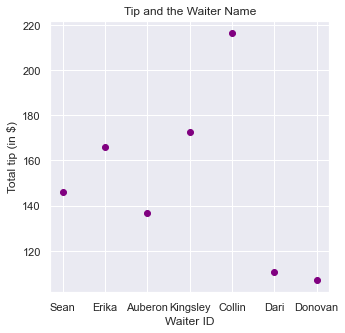

In [44]:
#Scatter plot for waiter id and the tip 
import matplotlib.pyplot as plt
plt.scatter(x=grouped['NAME'], y=grouped['TIP'], color='purple')
#ax.set_facecolor('white')
plt.xlabel('Waiter ID')
plt.ylabel('Total tip (in $)')
plt.title('Tip and the Waiter Name')
plt.show()

Text(0.5, 1.0, 'Count of orders taken')

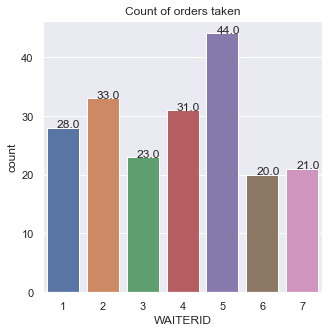

In [45]:
#how many times a waiter has taken order
import seaborn as sns
a=sns.countplot(data=orders, x="WAITERID")
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
a.set_title('Count of orders taken')

In [46]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=merged['NAME'], y=merged['TIP'],
    mode='markers',
    marker_size=[40, 60, 80,100,120,140,160])
])

fig.show()

In [47]:
dishes['TYPEOFCUISINE']=dishes['TYPEOFCUISINE'].str.strip()

In [48]:
grouped_dishes=dishes.groupby('TYPEOFCUISINE').sum().reset_index()
grouped_dishes

,TYPEOFCUISINE,DISHID,PRICE
0,Continental,10,659.12
1,English,37,714.12
2,Italian,31,866.19


Text(0.5, 1.0, 'Sum of prices and the cuisines')

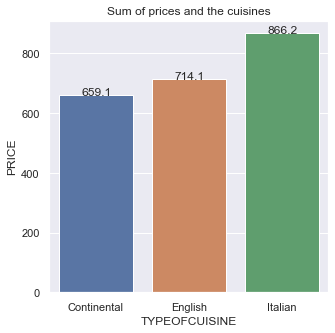

In [49]:
a=sns.barplot(data=grouped_dishes, x="TYPEOFCUISINE", y="PRICE")
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
sns.set(rc={'figure.figsize':(5,5)})
a.set_title('Sum of prices and the cuisines')